# Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing
### Jules EXBRAYAT & Abdenour MADANI

# Présentation

## Problématique

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnalisé la campagne marketing ?

## Jeu de données

### Lecture des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set()

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", index_col="ID")

### Présentation des variables

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [5]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


In [6]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [7]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Dt_Customer",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

# Nettoyage des données

## Données parasites

Données parasites : 2 colonnes non documentées, et qui contiennent des valeurs constantes => on les supprime.

Il y a 2240 /2240 individus pour lesquelles la variable Z_CostContact vaut 3.
Il y a 2240 /2240 individus pour lesquelles la variable Z_Revenue vaut 11.
Z_CostContact et Z_Revenue ne sont pas documentées dans le dataset. Elles sont constantes égales à 3 et 11. On décide de les supprimer car elles sont parasites et ne fournissent pas d'information.


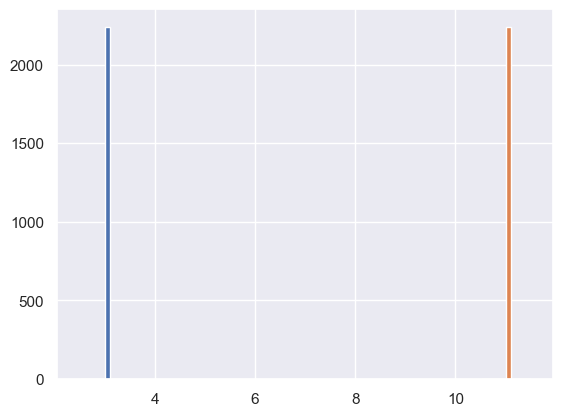

In [9]:
print(
    "Il y a",
    np.sum(df["Z_CostContact"] == 3),
    "/2240 individus pour lesquelles la variable Z_CostContact vaut 3.",
)
print(
    "Il y a",
    np.sum(df["Z_Revenue"] == 11),
    "/2240 individus pour lesquelles la variable Z_Revenue vaut 11.",
)

plt.hist(df["Z_CostContact"])
plt.hist(df["Z_Revenue"])

print(
    "Z_CostContact et Z_Revenue ne sont pas documentées dans le dataset. Elles sont constantes égales à 3 et 11.",
    "On décide de les supprimer car elles sont parasites et ne fournissent pas d'information.",
)

In [10]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

## Valeurs manquantes

In [11]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [12]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [13]:
# TODO: supprimer valeurs manquantes OU rempalcer par la moyenne ?

### Remplacement par la moyenne

In [14]:
# TODO: vérifier que le code ci-dessous fonctionne bien (pour l'instant je l'ai juste copié/collé au bon endroit)

In [15]:
income_mean = df["Income"].mean()

df_filtered = df[df["Income"].isna()]
df_filtered["Income"] = np.repeat(income_mean, 24)

df[df["Income"].isna()] = df_filtered
# Vérification du bon remplacement des valeurs manquantes
df[df["Income"].isna()].head()

C:\Users\jules\AppData\Local\Temp\ipykernel_14544\183338588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Income"] = np.repeat(income_mean, 24)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,


In [16]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Year_Birth                AxesSubplot(0.125,0.11;0.0407895x0.77)
Income                 AxesSubplot(0.173947,0.11;0.0407895x0.77)
Kidhome                AxesSubplot(0.222895,0.11;0.0407895x0.77)
Teenhome               AxesSubplot(0.271842,0.11;0.0407895x0.77)
Recency                AxesSubplot(0.320789,0.11;0.0407895x0.77)
MntWines               AxesSubplot(0.369737,0.11;0.0407895x0.77)
MntFruits              AxesSubplot(0.418684,0.11;0.0407895x0.77)
MntMeatProducts        AxesSubplot(0.467632,0.11;0.0407895x0.77)
MntFishProducts        AxesSubplot(0.516579,0.11;0.0407895x0.77)
MntSweetProducts       AxesSubplot(0.565526,0.11;0.0407895x0.77)
MntGoldProds           AxesSubplot(0.614474,0.11;0.0407895x0.77)
NumDealsPurchases      AxesSubplot(0.663421,0.11;0.0407895x0.77)
NumWebPurchases        AxesSubplot(0.712368,0.11;0.0407895x0.77)
NumCatalogPurchases    AxesSubplot(0.761316,0.11;0.0407895x0.77)
NumStorePurchases      AxesSubplot(0.810263,0.11;0.0407895x0.77)
NumWebVisitsMonth      Ax

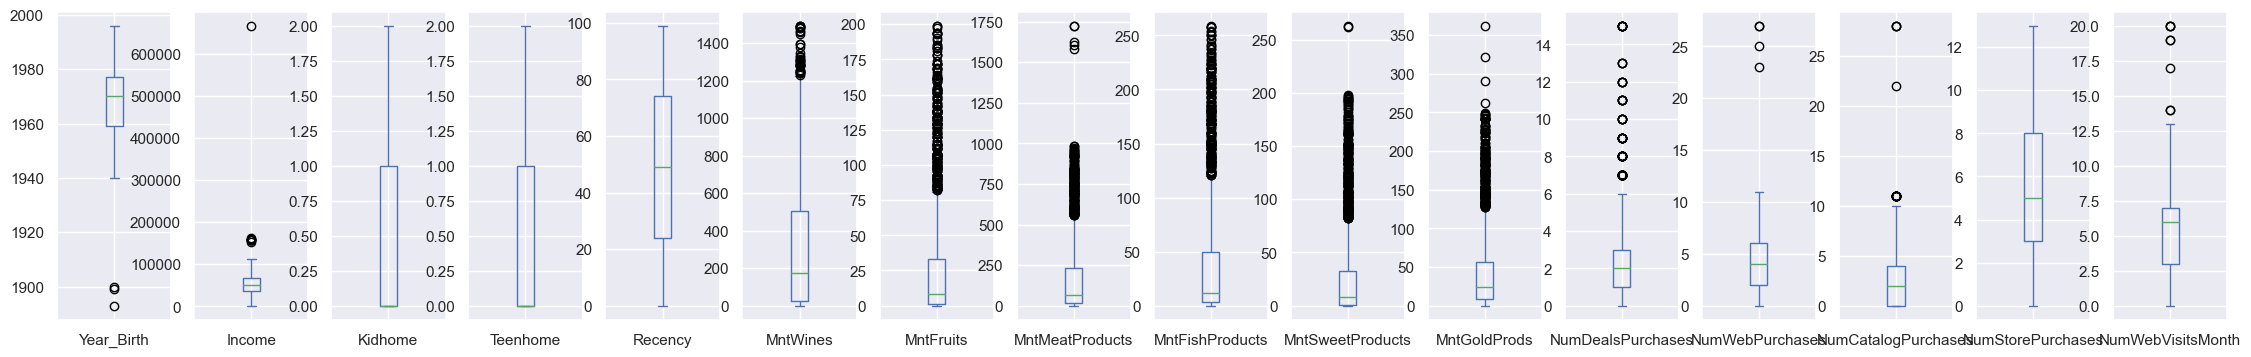

In [17]:
df[var_numeriques].plot(kind="box", subplots=True, sharey=False, figsize=(28, 4))

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>]], dtype=object)

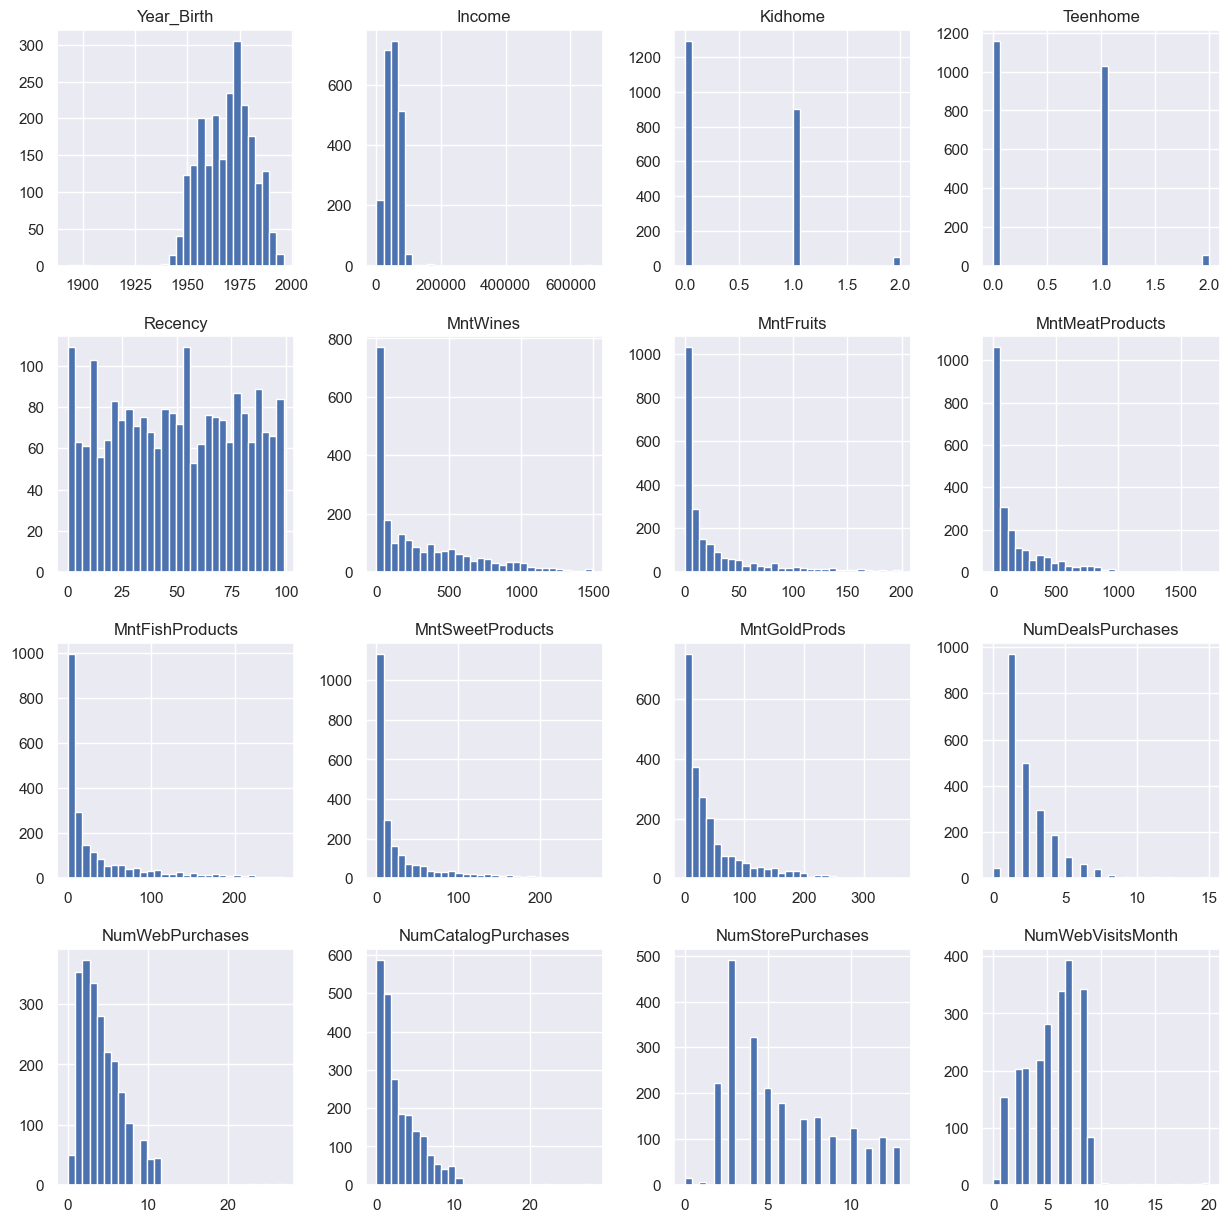

In [18]:
df[var_numeriques].hist(figsize=(15, 15), bins=30)

array([[<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'AcceptedCmp1'}>,
        <AxesSubplot:title={'center':'AcceptedCmp2'}>],
       [<AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
        <AxesSubplot:title={'center':'AcceptedCmp5'}>],
       [<AxesSubplot:title={'center':'Response'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

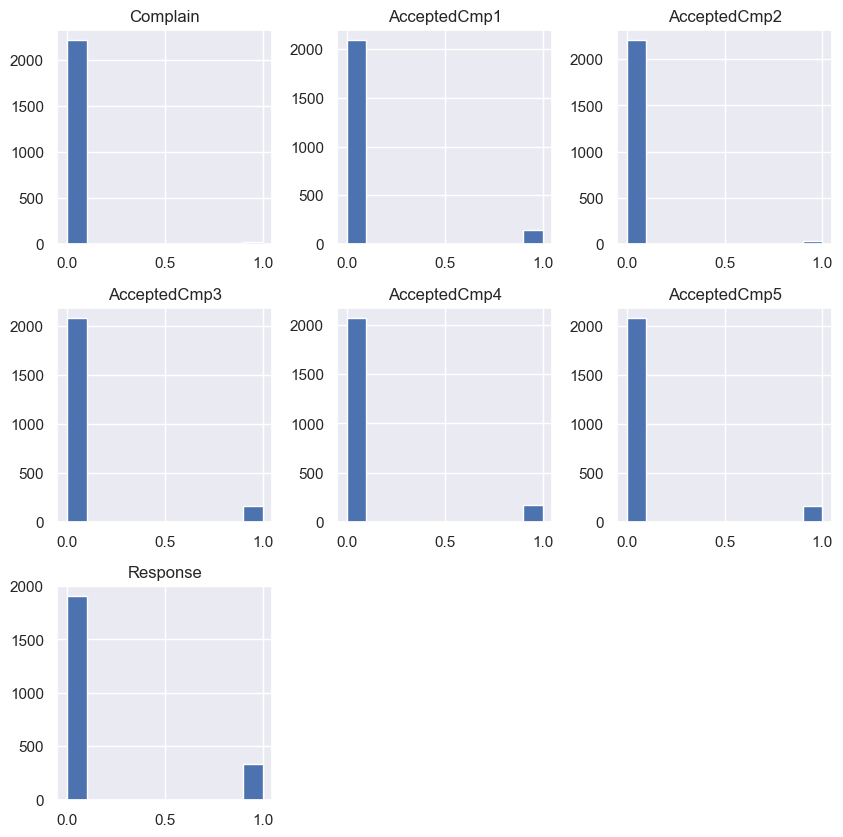

In [19]:
df[var_categoriques].hist(figsize=(10, 10))

<AxesSubplot:>

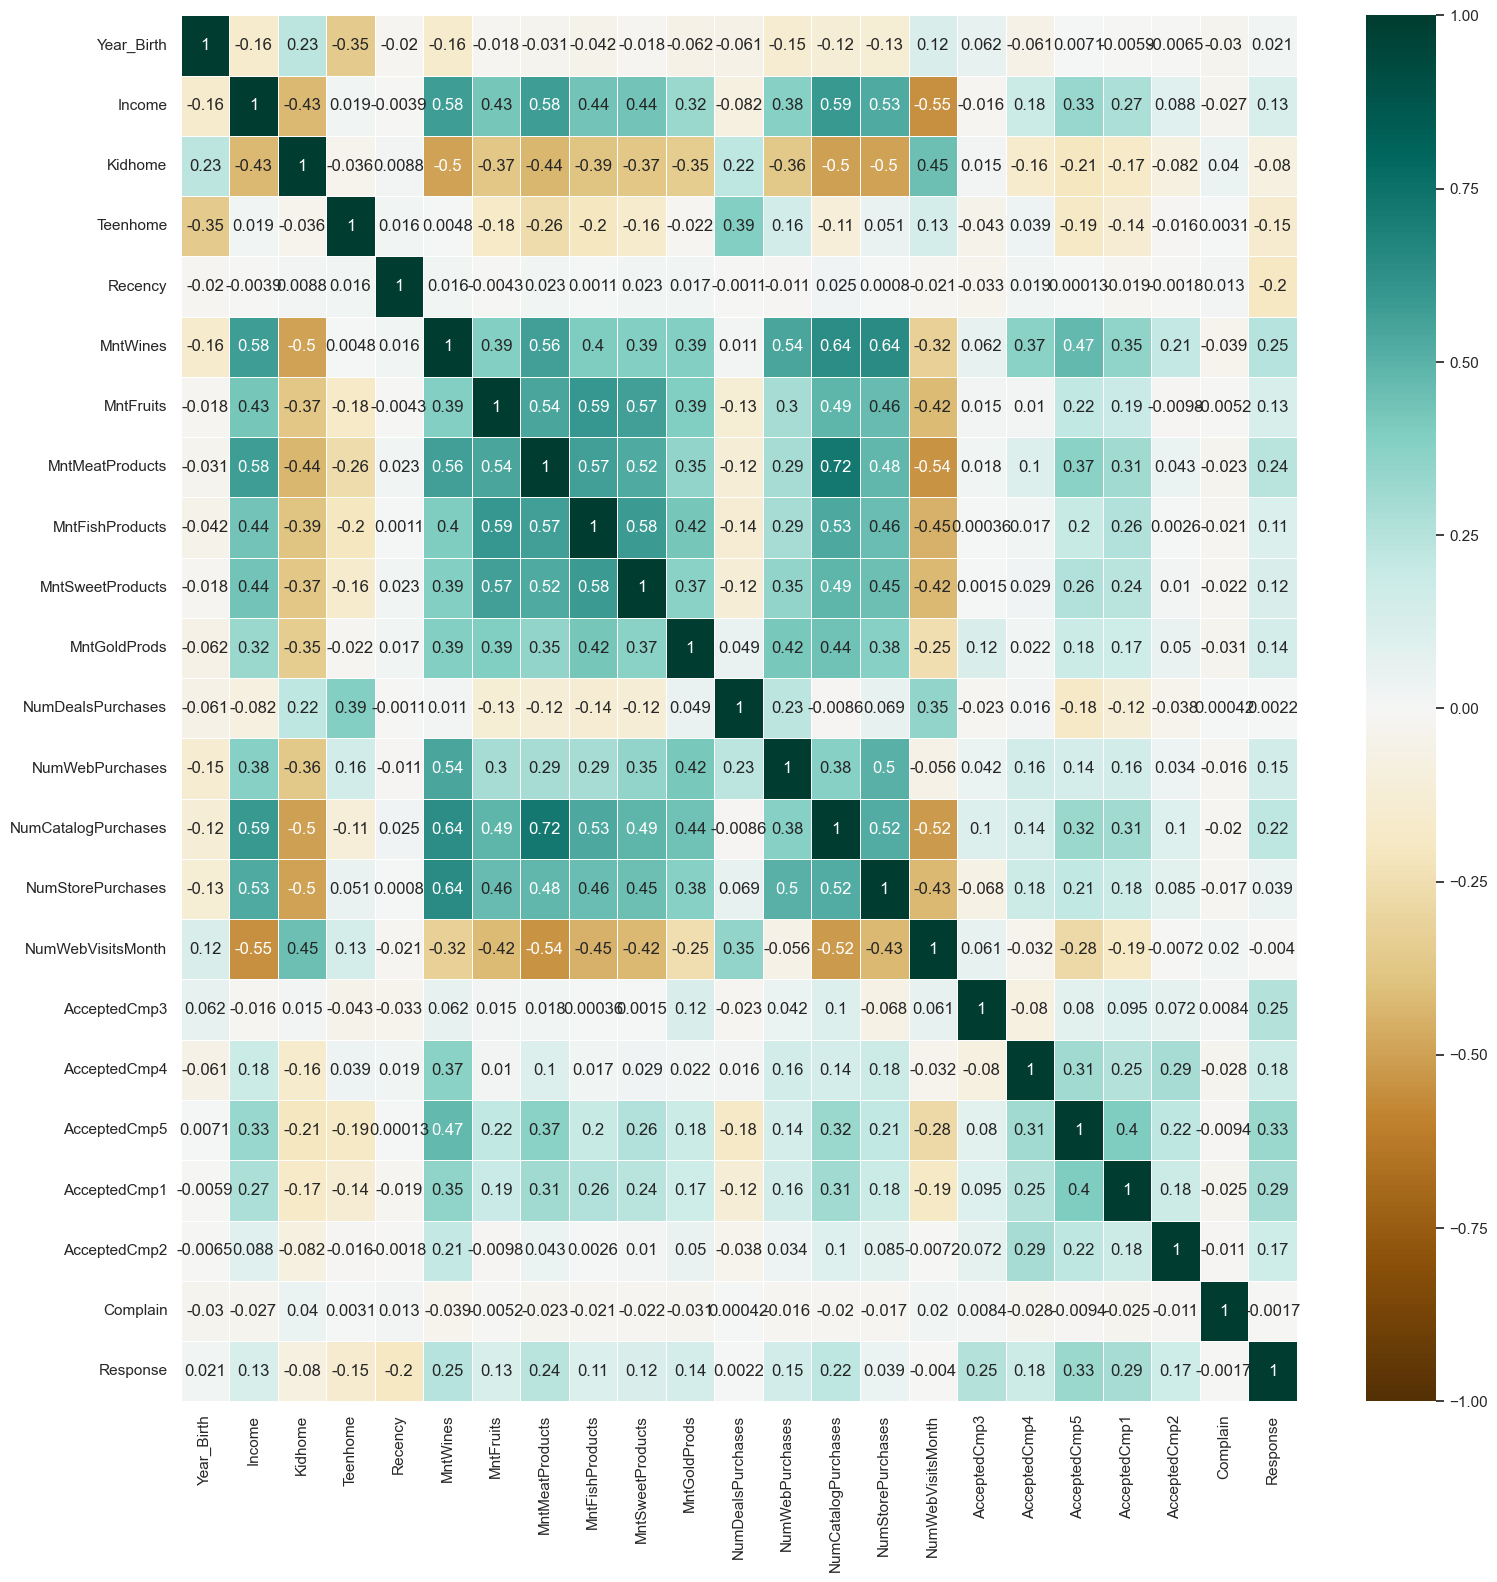

In [20]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
    linewidths=0.5,
)

## Valeurs extrêmes

In [21]:
# todo

# Transformation des données

## Normalisation (symétrisation)

In [22]:
donnees_symetriques = df.copy()

In [23]:
donnees_symetriques["Income"] = np.log(donnees_symetriques["Income"])

<AxesSubplot:>

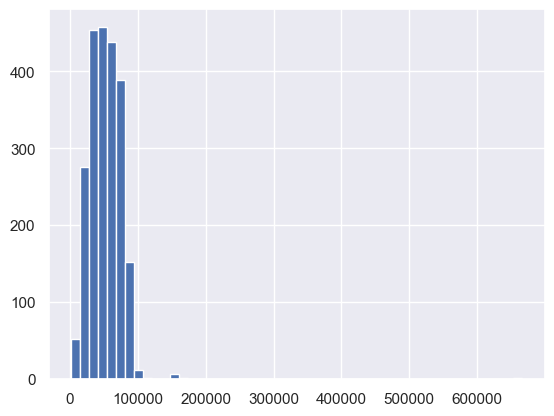

In [24]:
df["Income"].hist(bins=50)

<AxesSubplot:>

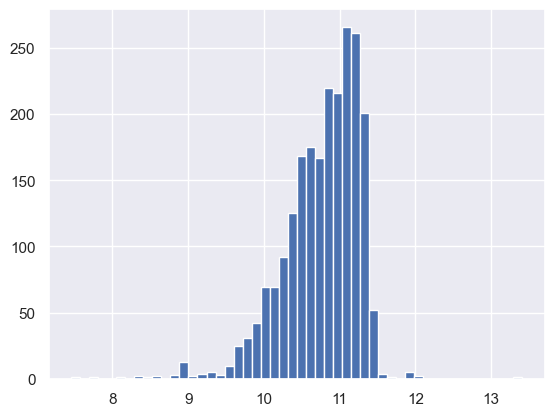

In [25]:
donnees_symetriques["Income"].hist(bins=50)

In [26]:
# TODO: utiliser la fonction stats.boxcox & mettre les formules Latex

In [27]:
# TODO: choisir QUELLES variables sont éligibles à la transformation (et lesquelles sont moins pertinentes / inadaptées)

In [28]:
def box_cox(liste_variables):  # une liste de noms de variables à transformer
    donnees_symetriques = df.copy()

    for var in liste_variables:
        if df[var].dtypes != "object":
            if min(donnees_symetriques[var]) <= 0:
                donnees_symetriques[var] = np.log(donnees_symetriques[var] + 1)
            else:
                donnees_symetriques[var] = np.log(donnees_symetriques[var])

    return donnees_symetriques


# box_cox(df.columns)

In [29]:
donnees_symetriques["MntWines"] = np.log(donnees_symetriques["MntWines"] + 1)
donnees_symetriques["MntFruits"] = np.log(donnees_symetriques["MntFruits"] + 1)
donnees_symetriques["MntMeatProducts"] = np.log(
    donnees_symetriques["MntMeatProducts"] + 1
)
donnees_symetriques["MntFishProducts"] = np.log(
    donnees_symetriques["MntFishProducts"] + 1
)
donnees_symetriques["MntSweetProducts"] = np.log(
    donnees_symetriques["MntSweetProducts"] + 1
)
donnees_symetriques["MntGoldProds"] = np.log(donnees_symetriques["MntGoldProds"] + 1)

donnees_symetriques["NumDealsPurchases"] = np.log(
    donnees_symetriques["NumDealsPurchases"] + 1
)

donnees_symetriques["NumWebPurchases"] = np.log(
    donnees_symetriques["NumWebPurchases"] + 1
)
donnees_symetriques["NumCatalogPurchases"] = np.log(
    donnees_symetriques["NumCatalogPurchases"] + 1
)
donnees_symetriques["NumStorePurchases"] = np.log(
    donnees_symetriques["NumStorePurchases"] + 1
)
donnees_symetriques["NumWebVisitsMonth"] = np.log(
    donnees_symetriques["NumWebVisitsMonth"] + 1
)

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>]], dtype=object)

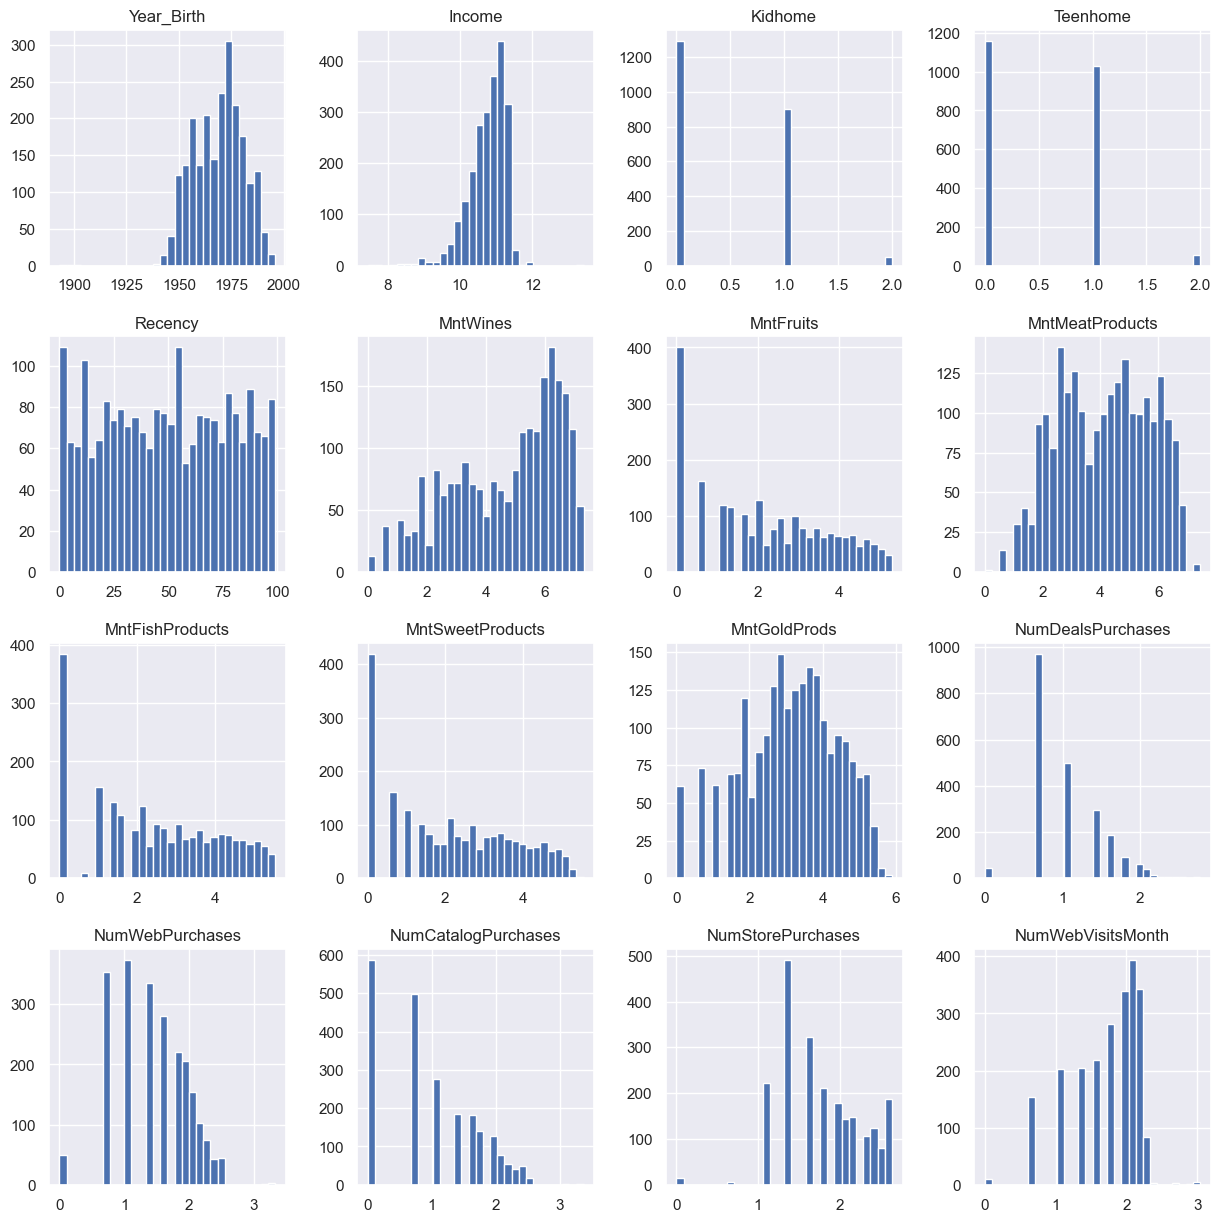

In [30]:
donnees_symetriques[var_numeriques].hist(figsize=(15, 15), bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x23346f8d550>,
 'caps': [<matplotlib.lines.Line2D at 0x23346f8daf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23346f8d280>],
 'medians': [<matplotlib.lines.Line2D at 0x23346fa40d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23346fa43a0>],
 'means': []}

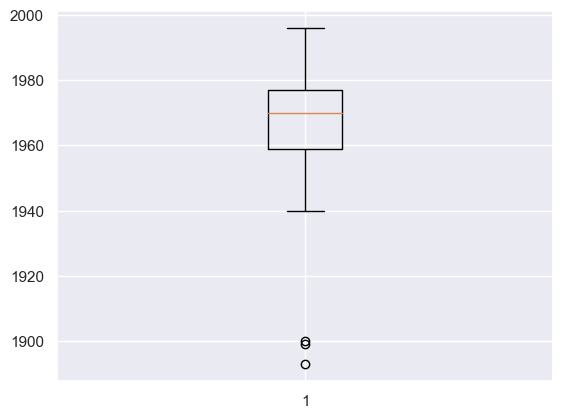

In [31]:
plt.boxplot(donnees_symetriques["Year_Birth"])

<AxesSubplot:>

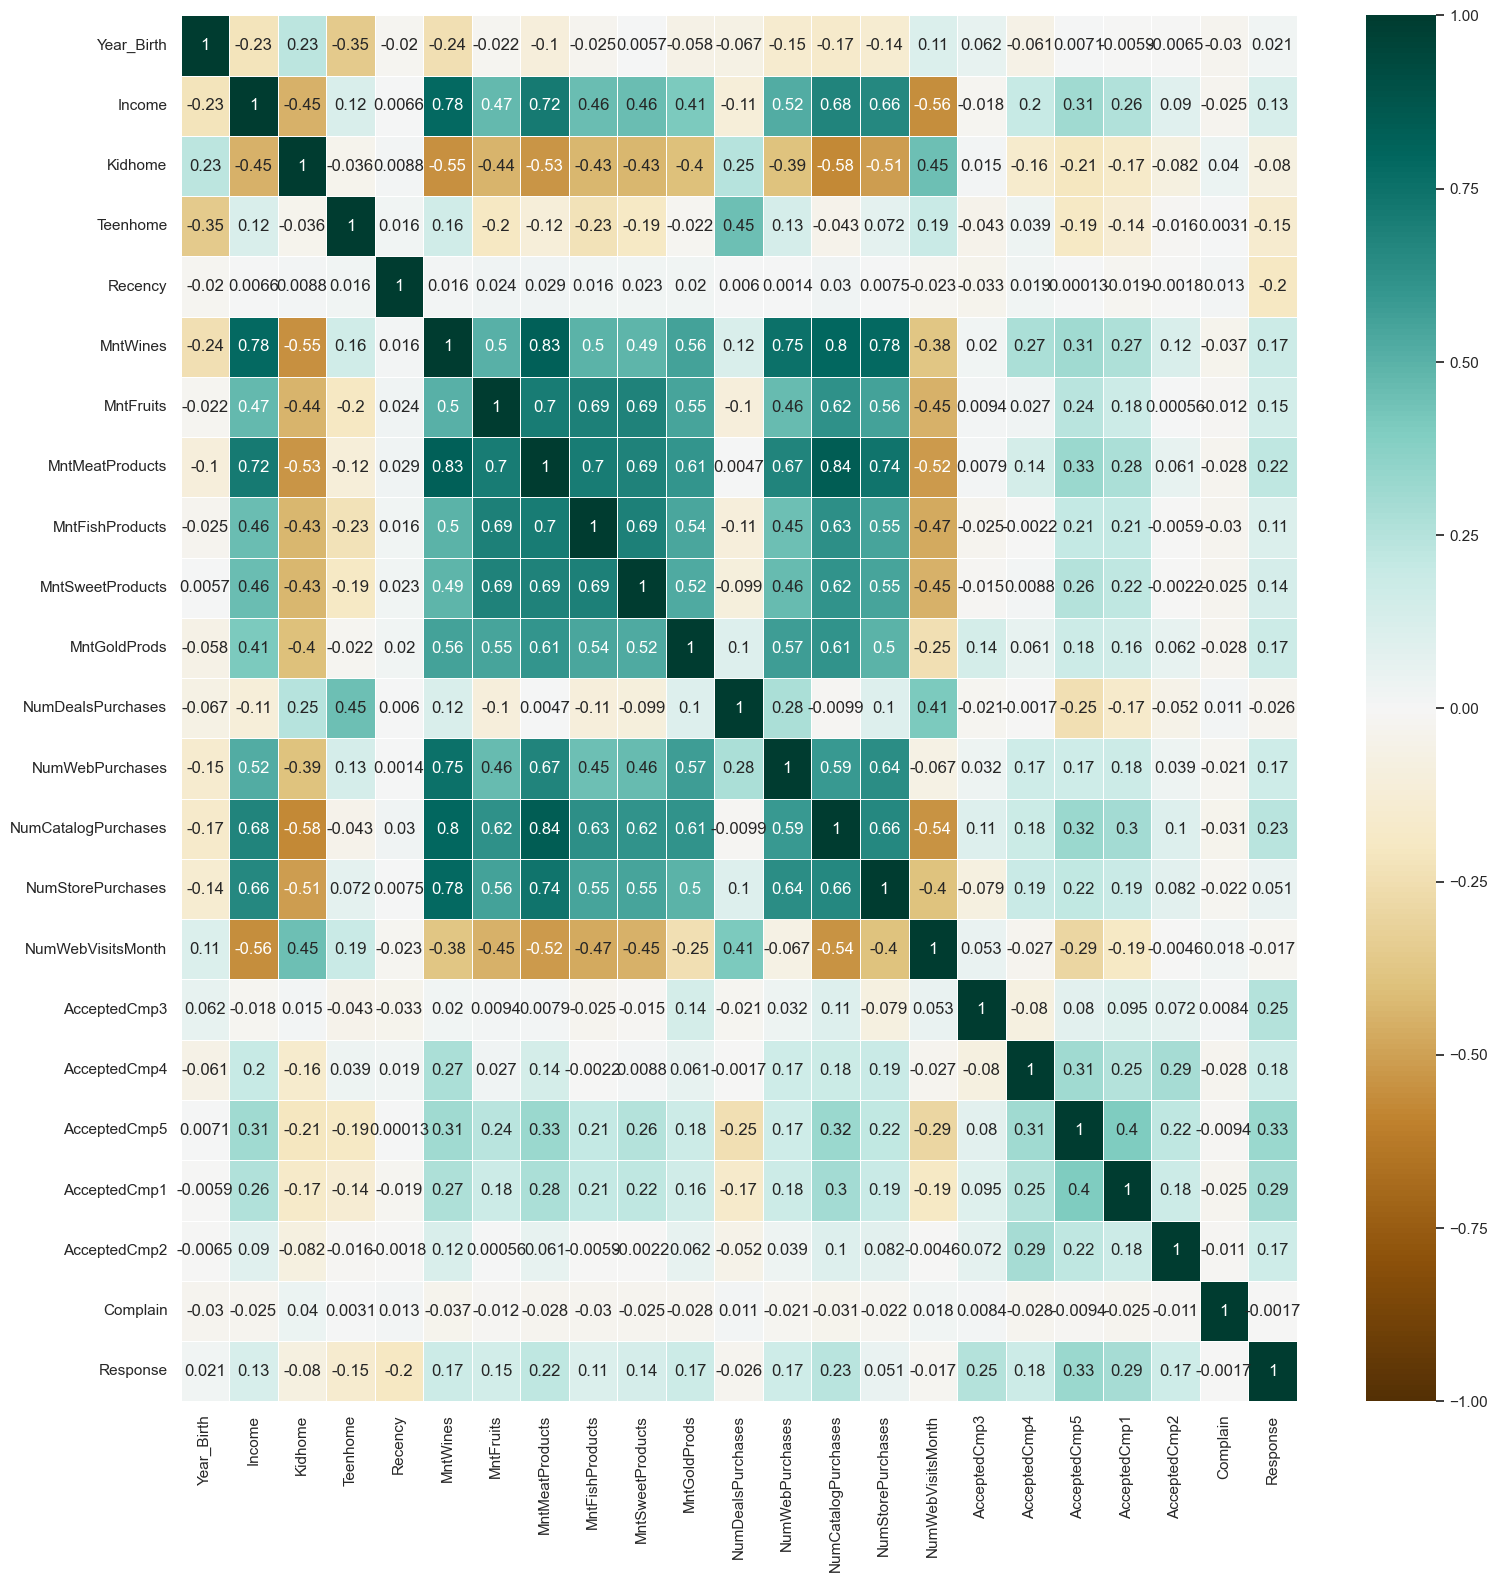

In [32]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnees_symetriques.corr(),
    annot=True,
    linewidths=0.5,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
)

<AxesSubplot:>

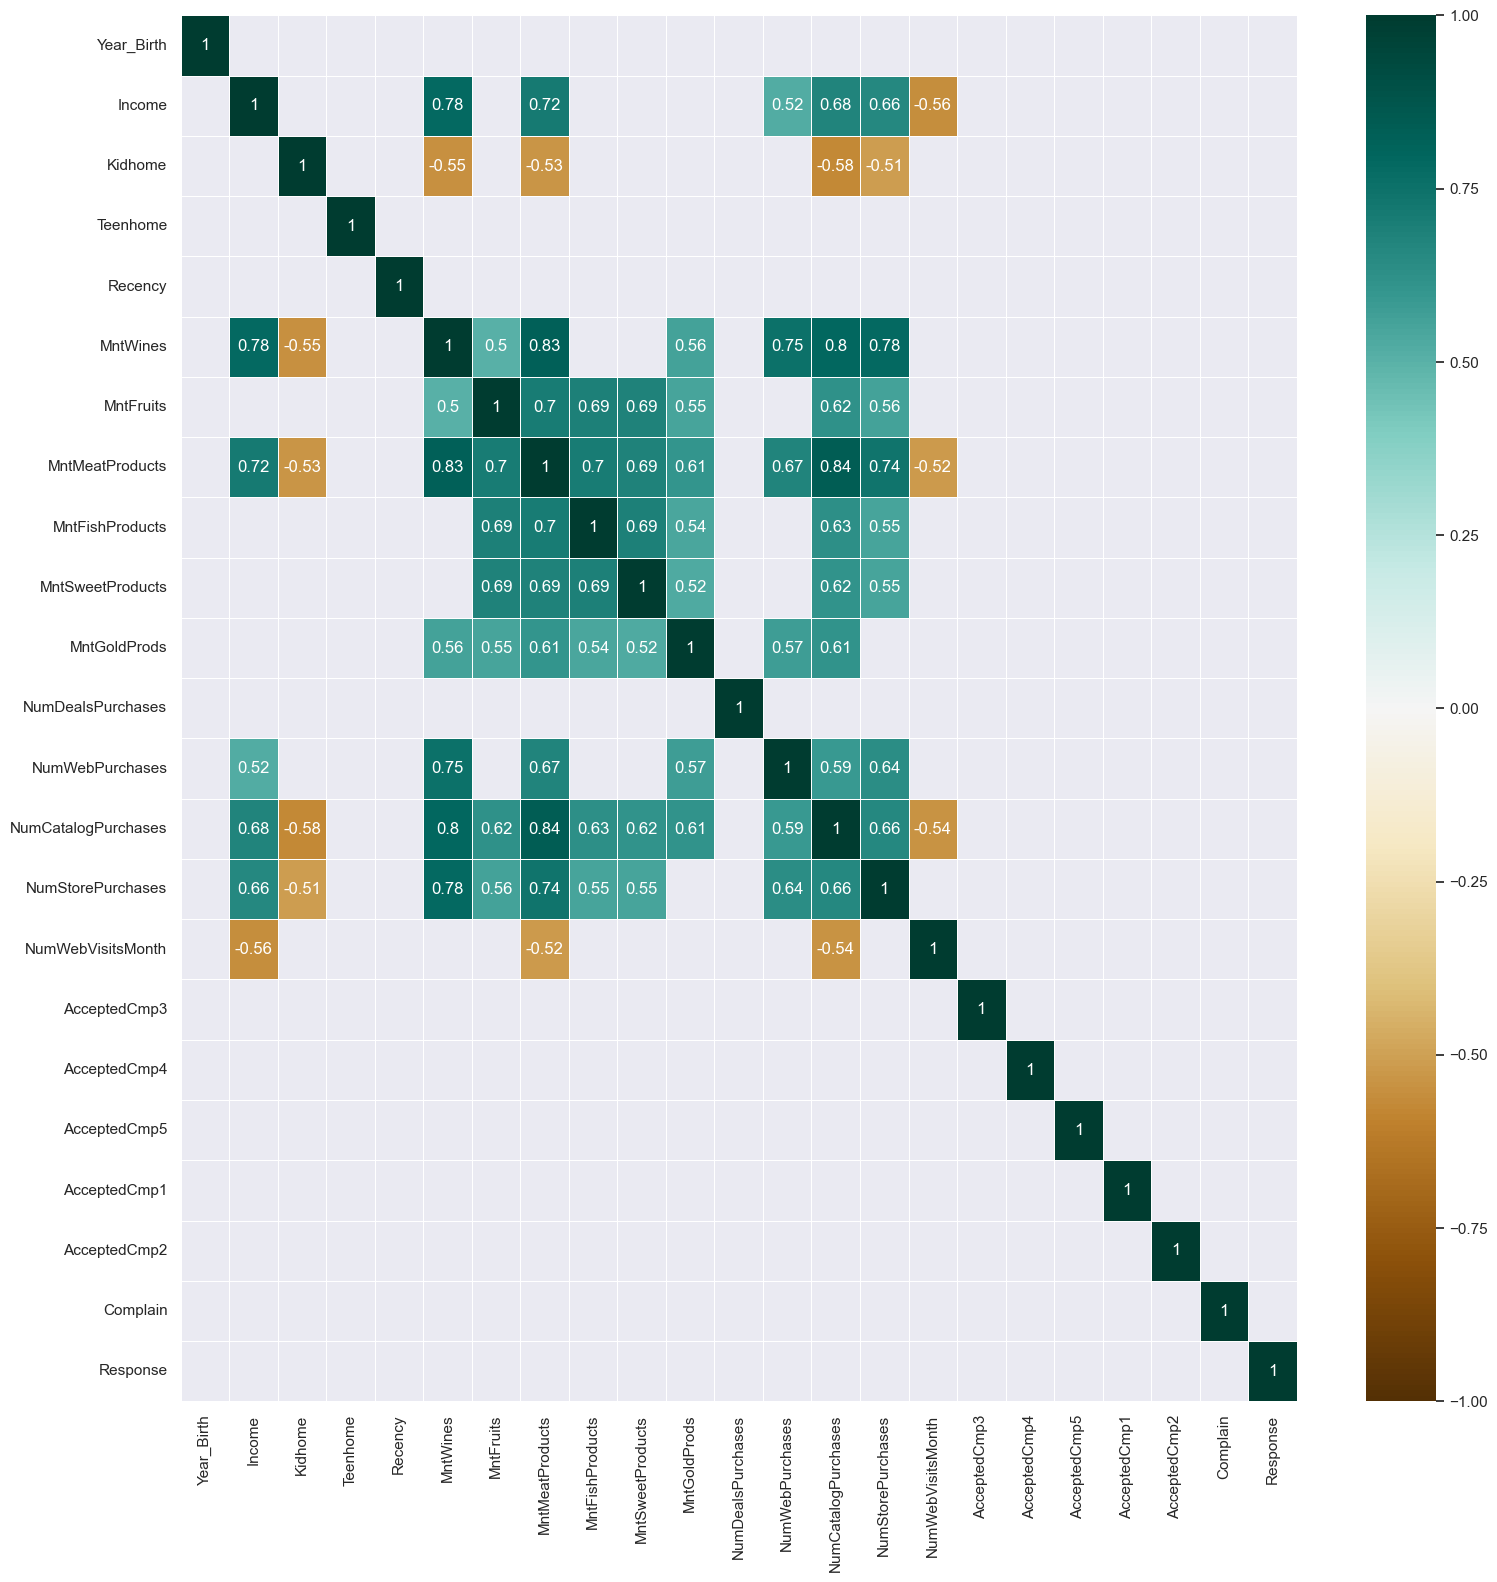

In [33]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnees_symetriques.corr()[donnees_symetriques.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

## Nettoyage (todo: à déplacer)

In [34]:
donnes_symetriques_nettoyees = donnees_symetriques.copy()

<AxesSubplot:>

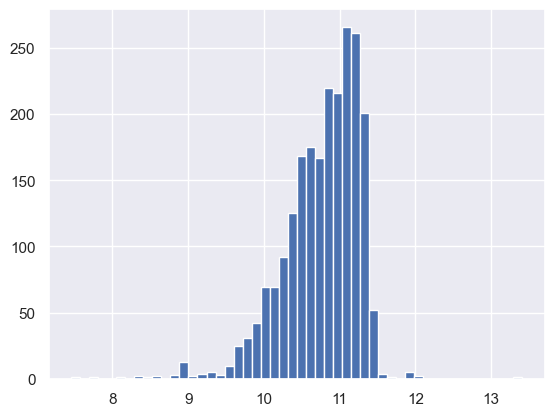

In [35]:
donnes_symetriques_nettoyees["Income"].hist(bins=50)

In [36]:
# TODO: est-il plus intéressant de nettoyer les données AVANT ou APRES la transformation Box Cox ?

# ancien code pour supprimer les données extrêmes :
# print("La valeur maximale de Income est", max(df["Income"]), ", essayons de la supprimer.")
#
# df = df.drop( index = df[ df['Income'] >= 666666 ].index )
#
# print("A présent, la valeur maximale de Income est", max(df["Income"]))
# df["Income"].plot(kind='box')

<AxesSubplot:>

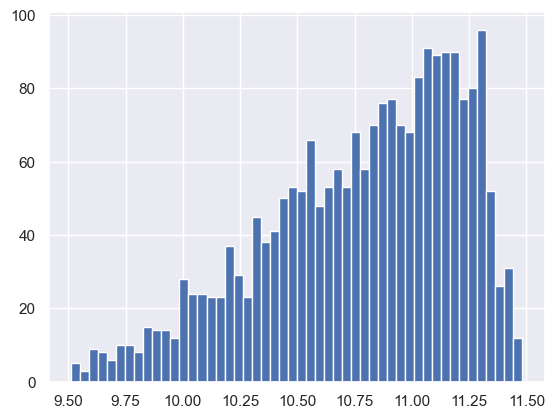

In [37]:
donnes_symetriques_nettoyees["Income"][donnes_symetriques_nettoyees["Income"] < 11.5][
    donnes_symetriques_nettoyees["Income"] > 9.5
].hist(bins=50)

In [38]:
donnes_symetriques_nettoyees["Income"] = donnes_symetriques_nettoyees["Income"][
    donnes_symetriques_nettoyees["Income"] < 11.5
][donnes_symetriques_nettoyees["Income"] > 9.5]

<AxesSubplot:>

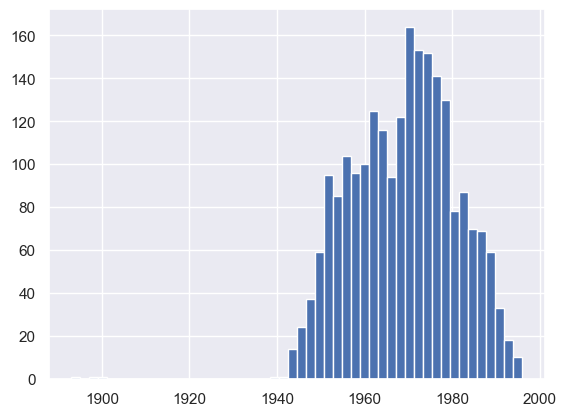

In [39]:
donnes_symetriques_nettoyees["Year_Birth"].hist(bins=50)

In [40]:
donnes_symetriques_nettoyees["Year_Birth"].min()

1893

<AxesSubplot:>

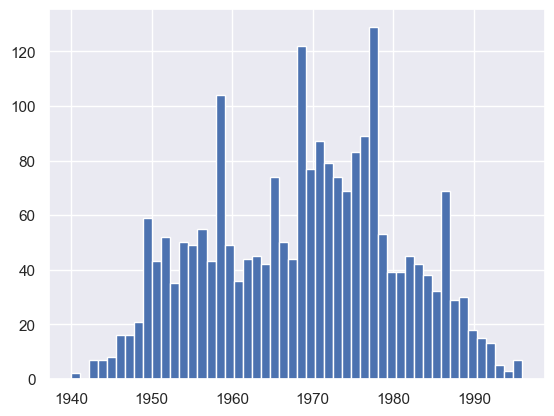

In [41]:
donnes_symetriques_nettoyees["Year_Birth"][
    donnes_symetriques_nettoyees["Year_Birth"] > 1930
].hist(bins=50)

In [42]:
donnes_symetriques_nettoyees["Year_Birth"] = donnes_symetriques_nettoyees["Year_Birth"][
    donnes_symetriques_nettoyees["Year_Birth"] > 1930
]

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>]], dtype=object)

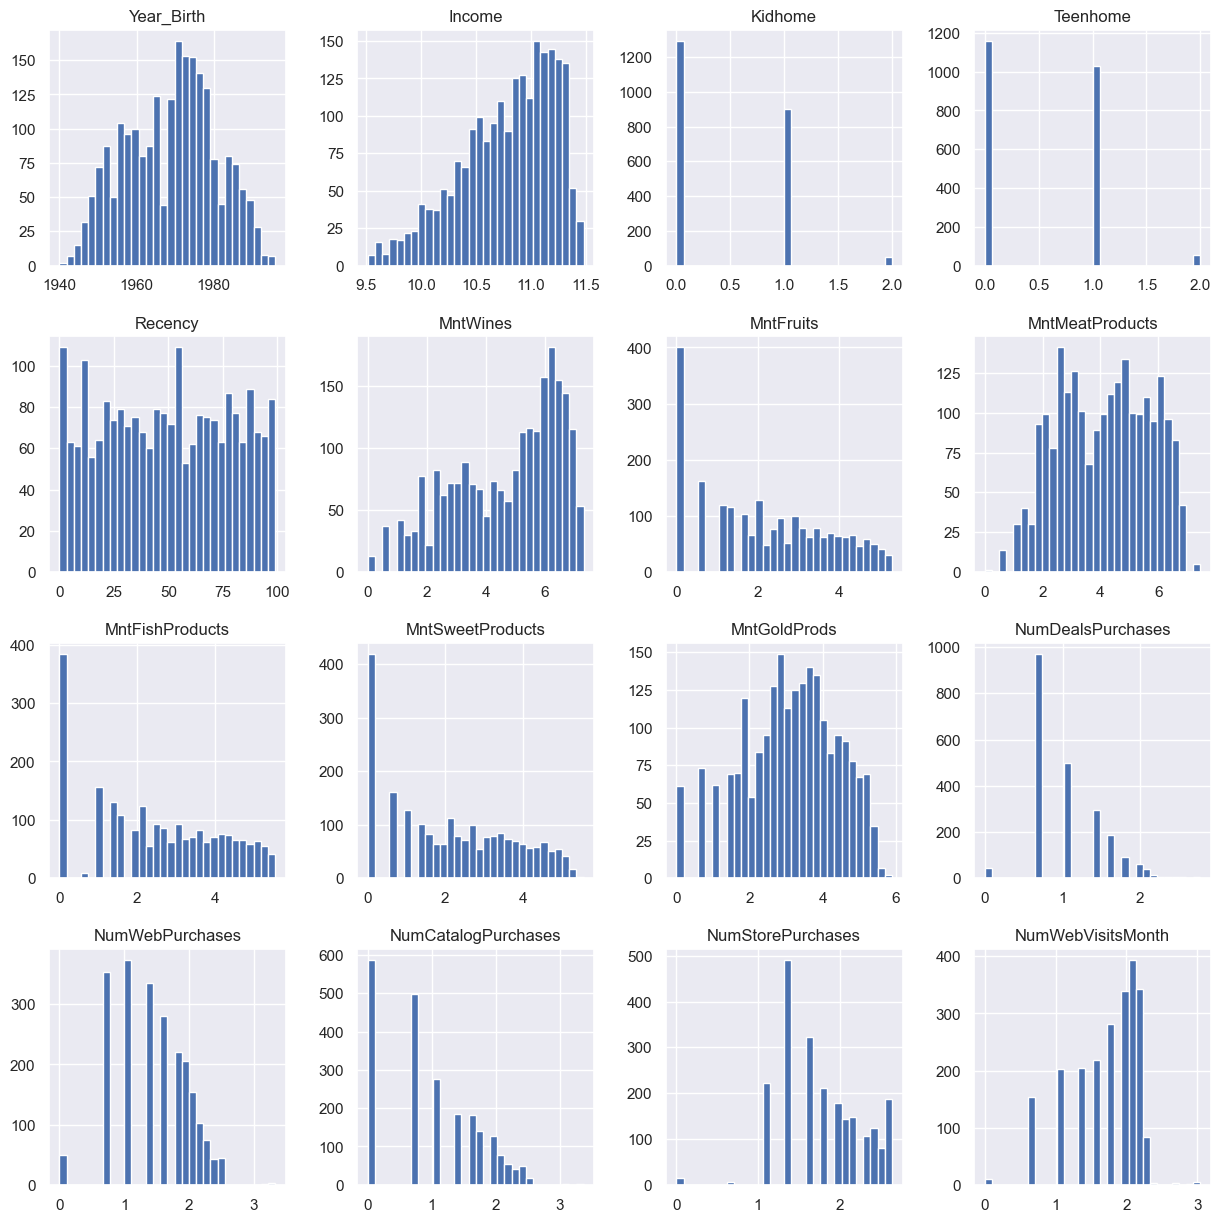

In [43]:
donnes_symetriques_nettoyees[var_numeriques].hist(figsize=(15, 15), bins=30)

<AxesSubplot:>

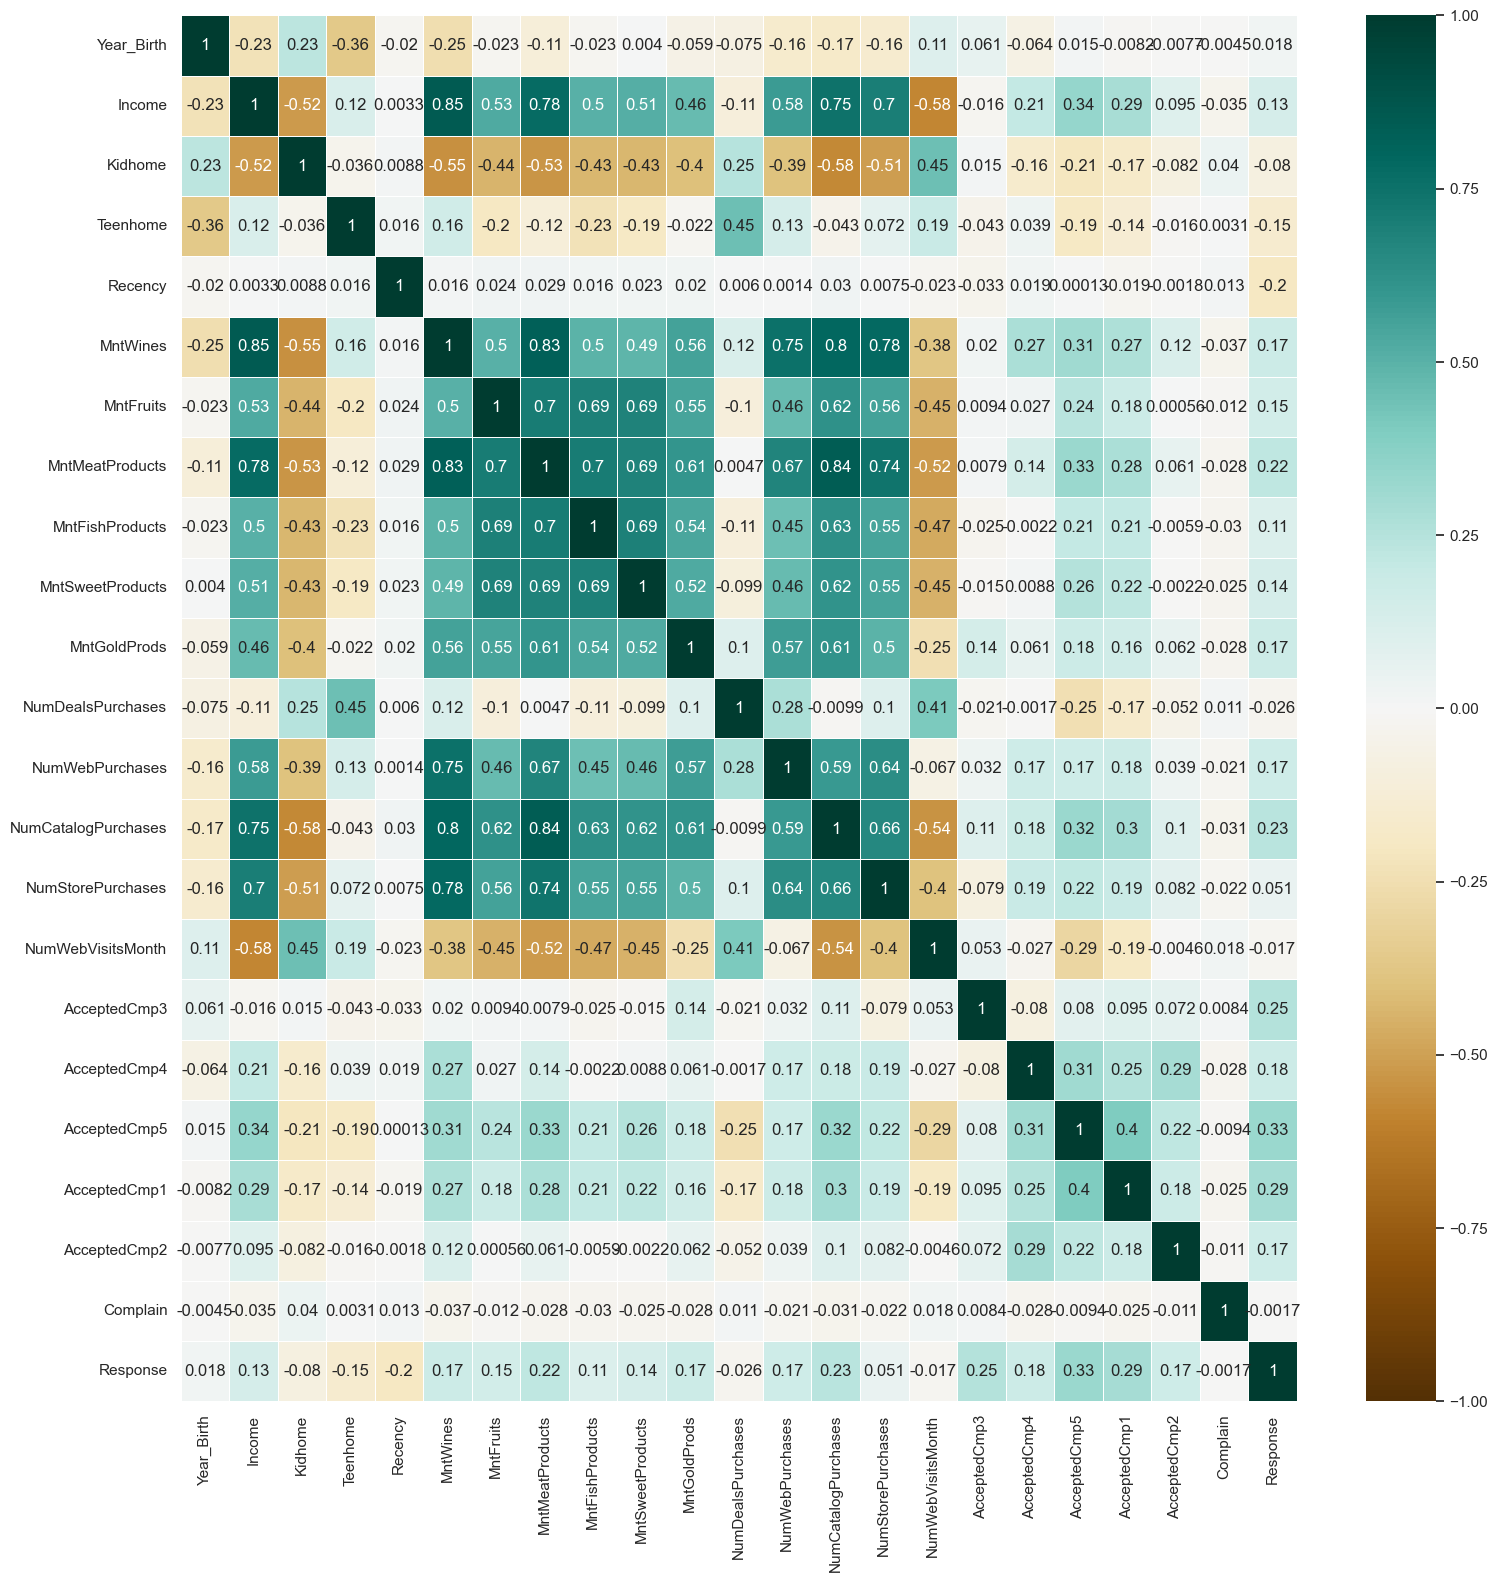

In [44]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnes_symetriques_nettoyees.corr(),
    annot=True,
    linewidths=0.5,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
)

c:\Users\jules\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

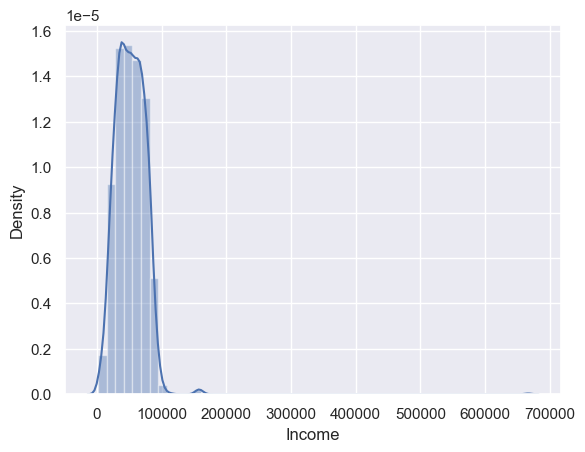

In [45]:
sns.distplot(df["Income"], bins=50)

c:\Users\jules\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

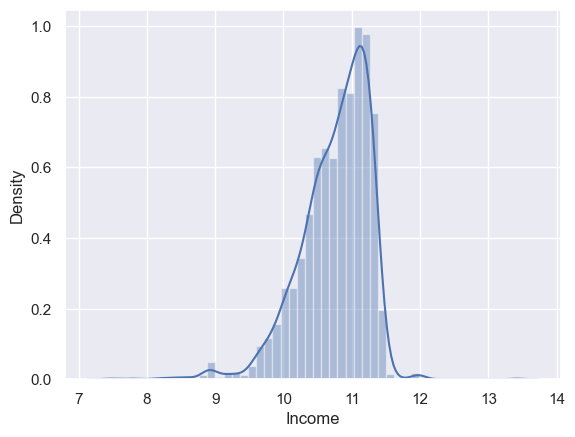

In [46]:
sns.distplot(donnees_symetriques["Income"], bins=50)

c:\Users\jules\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

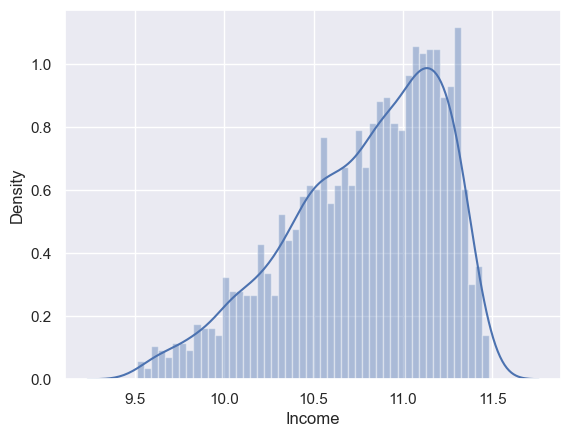

In [47]:
sns.distplot(donnes_symetriques_nettoyees["Income"], bins=50)

## Mise à l'échelle (todo: à mettre avant normalisation)

c:\Users\jules\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

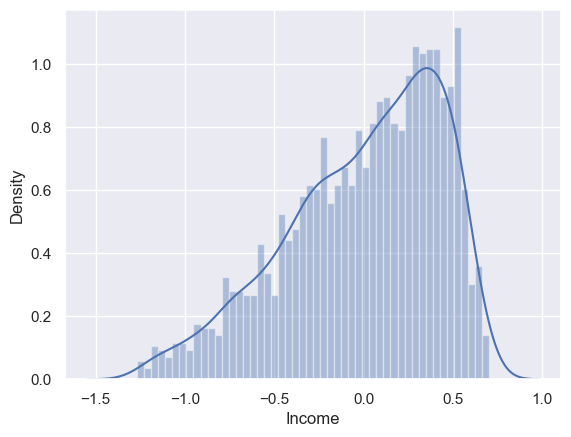

In [48]:
sns.distplot(
    donnes_symetriques_nettoyees["Income"]
    - donnes_symetriques_nettoyees["Income"].mean(),
    bins=50,
)

# Régression linéaire

## Hypothèses à vérifier pour entamer la régression linéaire
### Modèle simple : une variable à expliquer (Y) et une seule variable explicative (X)

1) coefficient de corrélation linéaire entre X et Y non nul

1) la distribution de l’erreur ε est indépendante de la variable X (exogénéité)  
cela implique que l'erreur est centrée i.e. E(ε) = 0

2) l’erreur est de variance constante (homoscédasticité)  
i.e Var(εi) = s, s une constante

3) les erreurs sont indépendantes (absence d'autocorrélation)  
i.e. Cov(εi, εj) = 0, pour tout i, j

4) si la distribution des erreurs suit une loi normale centrée, cette propriété est meilleure que les deux premières.

In [49]:
# TODO : calculer a la main les moindres carres ordinaires pour un
# modele simple, apres avoir verifier l'hyp 1 ci dessus.
# Puis faire la regression automatique avec une fonction python.

In [68]:
# nettoyage temporaire utile pour ce travail
df["Year_Birth"] = df["Year_Birth"][
    df["Year_Birth"] > 1930]

<AxesSubplot:xlabel='Income'>

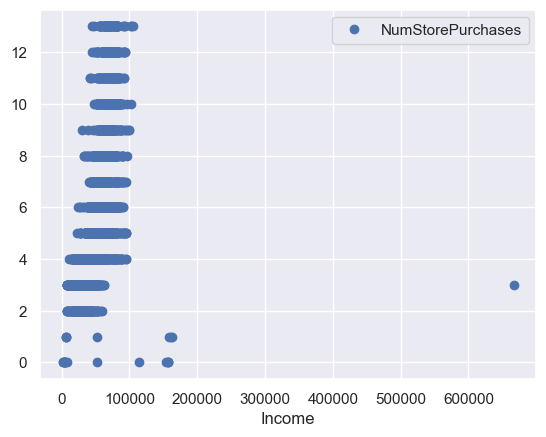

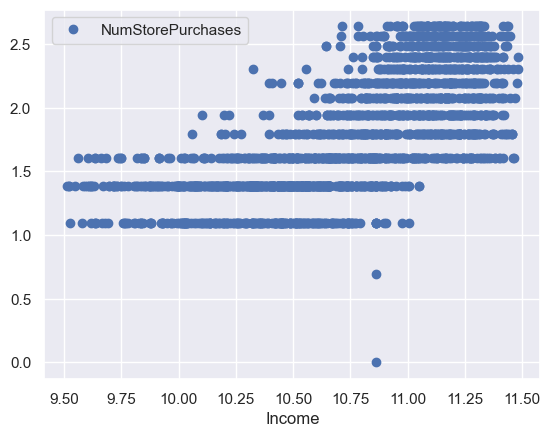

In [79]:
# demonstration de l efficacite du nettoyage et de la transformation des donnees
df.plot(x = 'Income', y = 'NumStorePurchases', style='o')
donnes_symetriques_nettoyees.plot(x = 'Income', y = 'NumStorePurchases', style='o')

<AxesSubplot:xlabel='Year_Birth'>

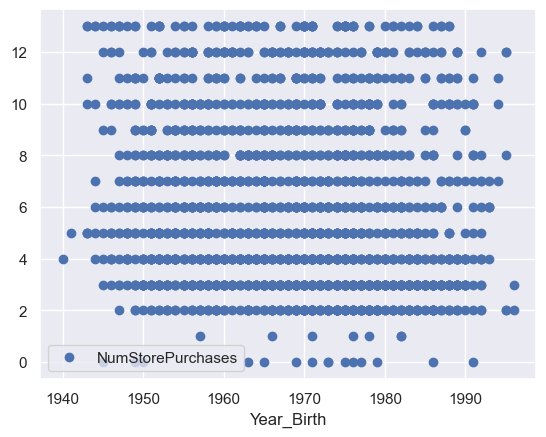

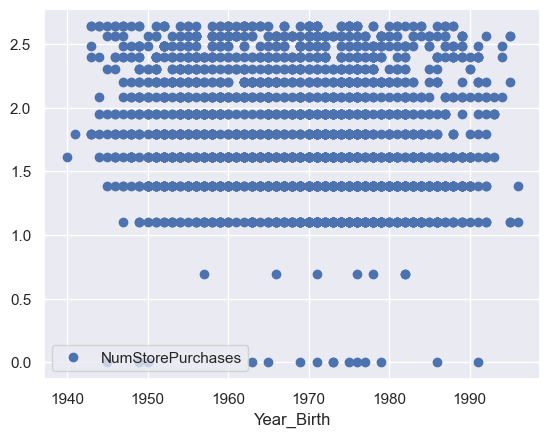

In [80]:
# un exemple de regression lineaire simple vaine
df.plot(x = 'Year_Birth', y = 'NumStorePurchases', style='o')
donnes_symetriques_nettoyees.plot(x = 'Year_Birth', y = 'NumStorePurchases', style='o')

<AxesSubplot:xlabel='NumStorePurchases'>

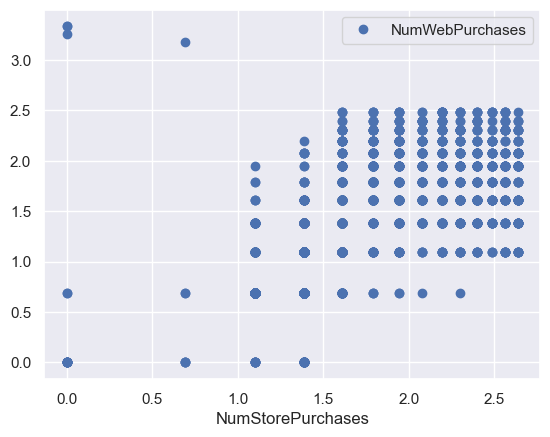

In [106]:
# un exemple de regression qui devrait etre efficace
donnes_symetriques_nettoyees.plot(x = 'NumStorePurchases', y = 'NumWebPurchases', style='o')

<AxesSubplot:xlabel='Income'>

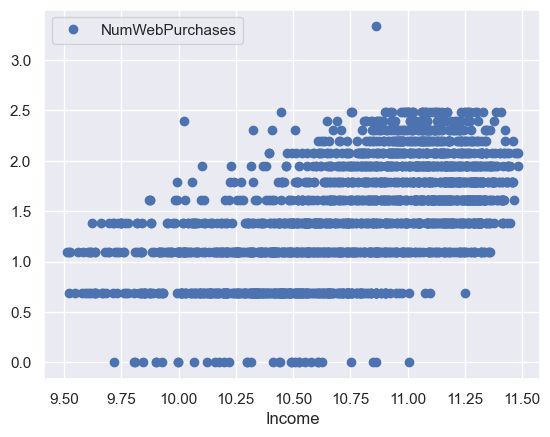

In [107]:
# on va essayer une regression lineaire simple sur ces deux variables
donnes_symetriques_nettoyees.plot(x = 'Income', y = 'NumWebPurchases', style='o')


In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [155]:
# il reste des nan qu on va nettoyer temporairement
na = donnes_symetriques_nettoyees['Income'].isna()
print(sum(na))
na_ = donnes_symetriques_nettoyees['NumWebPurchases'].isna()
print(sum(na_))

0
0


In [152]:
donnes_symetriques_nettoyees = donnes_symetriques_nettoyees[~donnes_symetriques_nettoyees['Income'].isna()]

In [191]:
income = np.array(donnes_symetriques_nettoyees['Income']).reshape(-1, 1)
web_purchases = np.array(donnes_symetriques_nettoyees['NumWebPurchases'])

In [192]:
model1 = LinearRegression().fit(income, web_purchases)

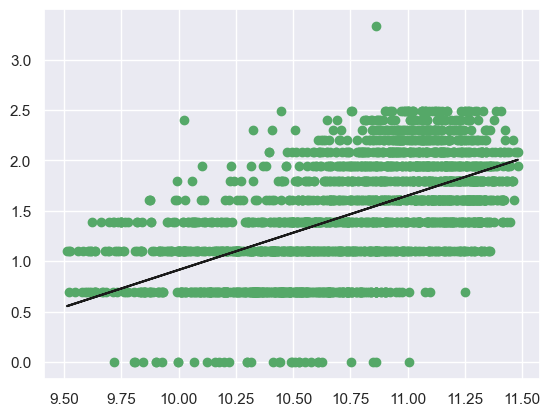

In [208]:
plt.scatter(income, web_purchases,color='g')
plt.plot(income, model1.predict(income),color='k')

In [201]:
r_sq = model1.score(income, web_purchases)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3346214152683781


(array([  9.,  19., 153., 415., 609., 526., 378.,  73.,   2.,   2.]),
 array([-1.65475548, -1.31108814, -0.9674208 , -0.62375347, -0.28008613,
         0.0635812 ,  0.40724854,  0.75091587,  1.09458321,  1.43825054,
         1.78191788]),
 <BarContainer object of 10 artists>)

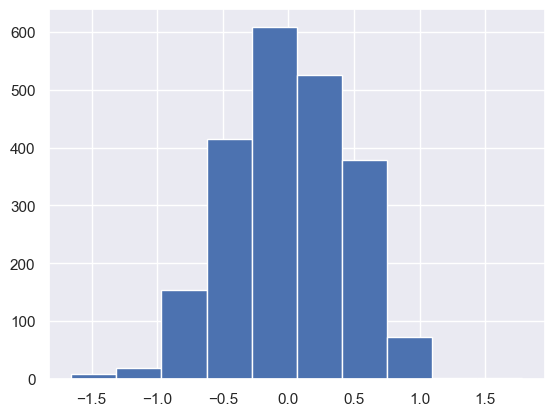

In [218]:
# check hypothese 2

residuals = web_purchases - model1.predict(income)
plt.hist(residuals)
# on a bien les residus suivant une loi normale, centree

ValueError: shapes (2186,1) and (2186,) not aligned: 1 (dim 1) != 2186 (dim 0)

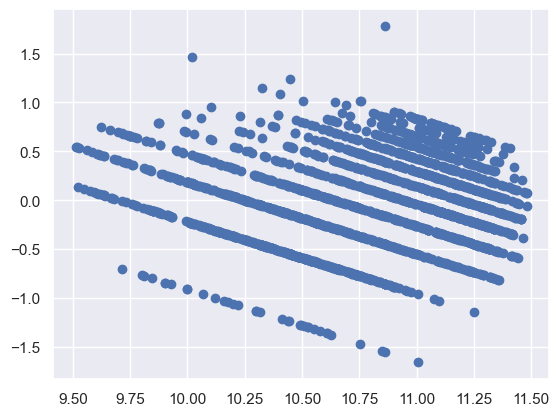

In [223]:
# independance de X et Y ?
from scipy.stats import pearsonr

plt.scatter(income, residuals)

# test de correlation de pearson
pearsonr(income, residuals)

In [196]:
# UN DEUXIEME EXEMPLE DE REGRESSION SIMPLE

store_purchases = np.array(donnes_symetriques_nettoyees['NumStorePurchases']).reshape(-1, 1)

In [197]:
model2 = LinearRegression().fit(store_purchases, web_purchases)

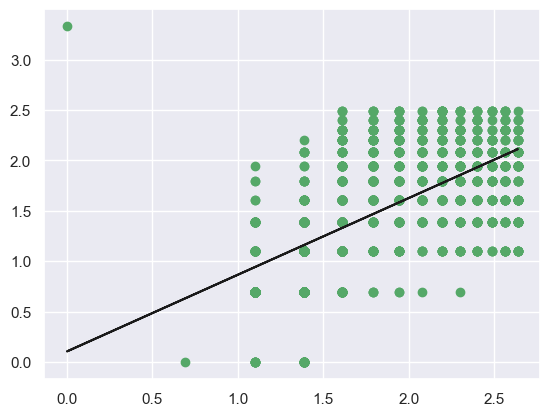

In [198]:
plt.scatter(store_purchases, web_purchases,color='g')
plt.plot(store_purchases, model2.predict(store_purchases),color='k')

In [199]:
r_sq = model2.score(store_purchases, web_purchases)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4104820011373249
